<a href="https://colab.research.google.com/github/Asifbinsyed/Pytorch/blob/main/PyTorch_custom_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
# setting up a device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Let's get the data from the github repository it is in . it have few steps

# Let's import the request, zipfile and Path from pathlib folder
import requests, zipfile
from pathlib import Path

# now the next things is to define the folder path and image path
folder_path = Path("data/")
image_path = folder_path / "pizza_steak_sushi"
#print(image_path)

# now we need to check if in that particular directory we have that file available or not
if image_path.is_dir():
  print("the data folder is already there")
else:
  #create a new directory
  image_path.mkdir(parents= True, exist_ok= True)

# Now the goal is to send a request to that github file that I need to access
with open(folder_path/"pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  # now we need copy the content from the content
  f.write(request.content)

# Now unzip the folder
with zipfile.ZipFile(folder_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
  print("unzipping the file")
  zip_ref.extractall(image_path)




the data folder is already there
unzipping the file


In [ ]:
import os
def datawalk_trough(dir):
  for dirpath, dirname, filename in os.walk(dir):
    print(f"we have total {len(filename)} files  in total {len(dirname)} directories in {dirpath}")


In [ ]:
datawalk_trough(image_path)

we have total 0 files  in total 2 directories in data/pizza_steak_sushi
we have total 0 files  in total 3 directories in data/pizza_steak_sushi/train
we have total 78 files  in total 0 directories in data/pizza_steak_sushi/train/pizza
we have total 75 files  in total 0 directories in data/pizza_steak_sushi/train/steak
we have total 72 files  in total 0 directories in data/pizza_steak_sushi/train/sushi
we have total 0 files  in total 3 directories in data/pizza_steak_sushi/test
we have total 25 files  in total 0 directories in data/pizza_steak_sushi/test/pizza
we have total 19 files  in total 0 directories in data/pizza_steak_sushi/test/steak
we have total 31 files  in total 0 directories in data/pizza_steak_sushi/test/sushi


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

# Now Let's Visualize one image
- let's get the image path list using glob function
- pick a random image
- get the image name
- open the image with python `PIL`
- show the image and print metadata

[PosixPath('data/pizza_steak_sushi/train/pizza/2800325.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2760984.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/38349.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2382016.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/5764.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3441394.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2569760.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2702825.jpg'), PosixPath('data/pizza_steak_sushi

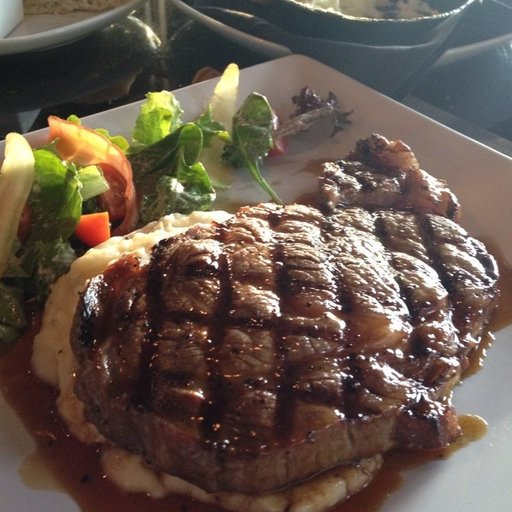

In [ ]:
from PIL import Image
from pathlib import Path as Path
import random

# get all the imagepath
all_image_path = list(image_path.glob("*/*/*.jpg"))
print(all_image_path)

# Choose a random number
torch.manual_seed(42)

# get a random image  by taking the parents folder name of the image
random_image = random.choice(all_image_path)
print(random_image)

# get the image name
print(random_image.parent.stem)

# Open the image with PIL
image = Image.open(random_image)
image.show()
display(image)

# Let's make this images in Matplotlib


(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

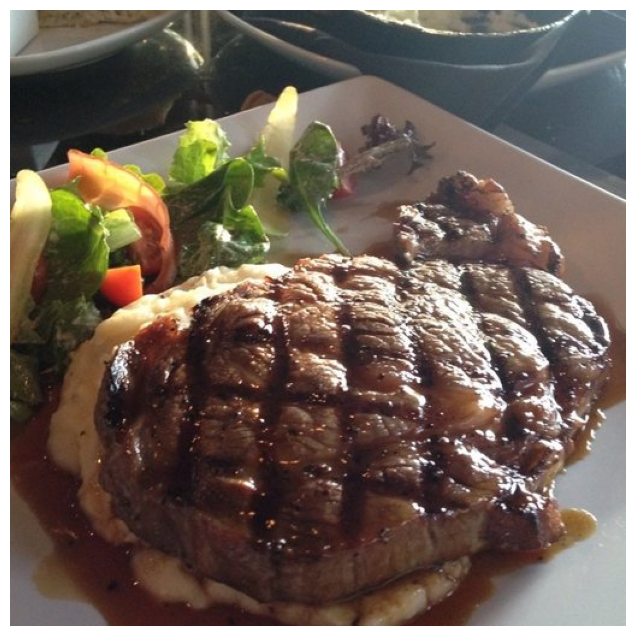

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_array = np.asarray(image)
print(image_array.shape)

# Let's show this in matplotlib
plt.figure(figsize= (10, 8))
plt.imshow(image_array)
plt.axis(False)

# Transform the images to tensor


In [ ]:
from torchvision import transforms, datasets

# Let's start with the data transform
data_transformation = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()]
)


# Let's transform it now
transformed_data = data_transformation(image)
transformed_data.shape

torch.Size([3, 64, 64])

'steak'

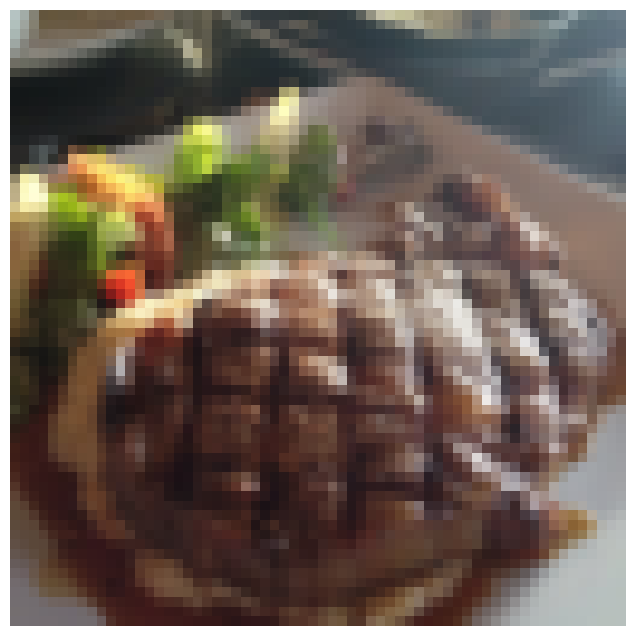

In [ ]:
# Now the goal is to print some a transformed image using matplotlib
# Let's show this in matplotlib
plt.figure(figsize= (10, 8))
plt.imshow(transformed_data.permute(1, 2, 0).numpy())
plt.axis(False)
random_image.parent.stem

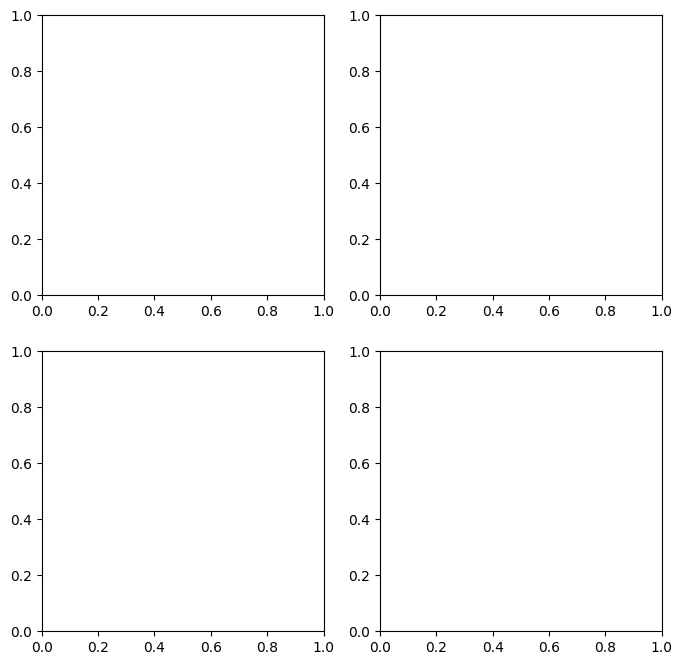

In [ ]:
# How about let's create a set of image let's go with four first
fig, axis = plt.subplots(2,2, figsize= (8,8))
plt
for image in range(4):
  #print(random.choice(all_image_path))
  img = random.choice(all_image_path)


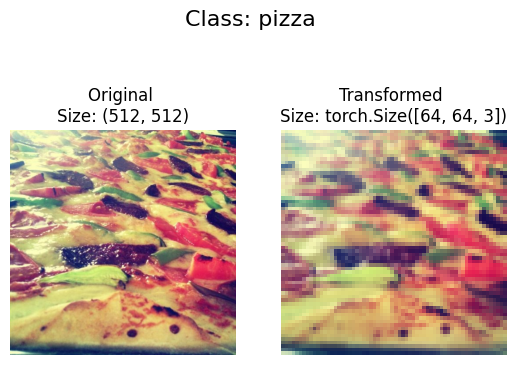

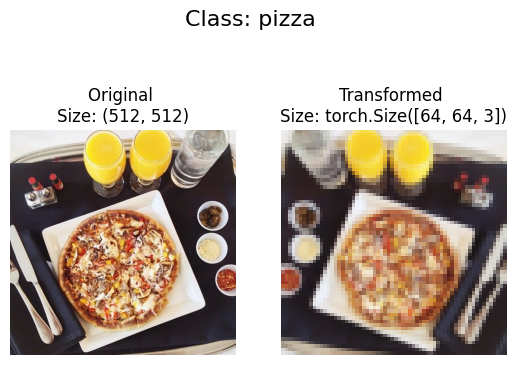

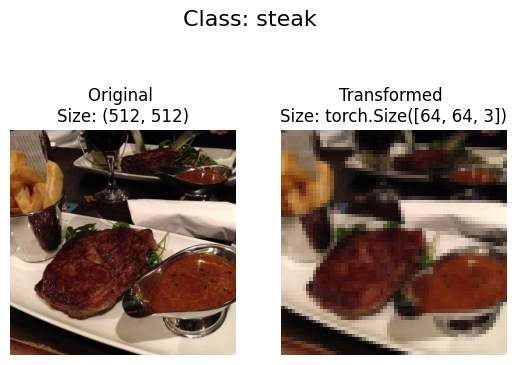

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(all_image_path,
                        transform=data_transformation,
                        n=3)

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = '/content/data/pizza_steak_sushi/train',
                                  transform= data_transformation,
                                  target_transform= None
                              )

test_data = datasets.ImageFolder(root = '/content/data/pizza_steak_sushi/test',
                                  transform= data_transformation,
                              )


In [ ]:
train_data.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data[0][0]

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
# let's take a sample from the data
sample_data, label = train_data[0][0], train_data.targets[0]

In [ ]:
# Now let's see some of the attribute of the data
print(f'the shape of the image {sample_data.shape}')
print(f"the data type of the sample {sample_data.dtype}")
print(f"the example of   label {label}")


the shape of the image torch.Size([3, 64, 64])
the data type of the sample torch.float32
the example of   label 0


In [ ]:
# Now let's draw an image
channel_transformation = torch.permute(sample_data, (1,2,0))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
channel_transformation.size()

torch.Size([64, 64, 3])

Text(0.5, 1.0, 'pizza')

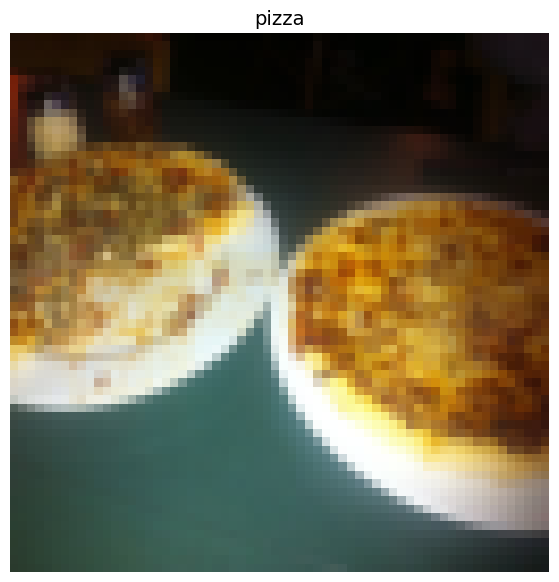

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(channel_transformation)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size = 32, shuffle= True, num_workers=1)
test_dataloader = DataLoader(test_data, batch_size = 32, shuffle= True, num_workers=1)


In [ ]:
train_dataloader

In [ ]:
#to view every iterated batch
for batch_images, batch_labels in train_dataloader:
    print(f"Batch shape: {batch_images.shape}, Labels: {batch_labels}")

Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2,
        2, 1, 0, 0, 2, 2, 0, 1])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2,
        0, 1, 2, 0, 2, 2, 1, 1])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2,
        2, 2, 0, 2, 0, 1, 1, 0])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0,
        2, 0, 1, 0, 2, 1, 1, 0])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0,
        0, 0, 0, 0, 2, 0, 0, 1])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1,
        1, 0, 1, 2, 1, 2, 0, 1])
Batch shape: torch.Siz

In [ ]:
for batch_images, batch_labels in test_dataloader:
    print(f"Batch shape: {batch_images.shape}, Labels: {batch_labels}")

Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2,
        1, 0, 2, 2, 1, 0, 2, 1])
Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2,
        0, 0, 1, 0, 2, 2, 0, 2])
Batch shape: torch.Size([11, 3, 64, 64]), Labels: tensor([2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2])


In [ ]:
from typing import Tuple, Dict, List
import os
# Let's create the classes

# define a function of creating the classes with input as path
def get_classes(directory: str ) ->  Tuple[list[str], dict[str,int]]:
  """finds the class folder names in a target directory
  assumes target directory is a standard image classification format
  Args:
    directory(str): target directory to load the image
  Returns:
    Tuple [List[str], dict[str,int]]: list of class and dictionary of index and class names
  Example: get_classes("food_images/train")
  >>>([class1,class2, ...], {class_1: 0, class_2: 1...})
  """
  # scan the directories (os.scandir() will be helpful) and get class name
  classes= sorted([entry.name for entry  in (os.scandir(directory)) if entry.is_dir()])
  # get the class_idx
  class_idx = {entry: index for entry, index in enumerate(classes)}
  # let's retrun all the all the classes and class_idx
  return classes, class_idx


In [ ]:
path_to_train="/content/data/pizza_steak_sushi/train"

In [ ]:
get_classes(path_to_train)

(['pizza', 'steak', 'sushi'], {0: 'pizza', 1: 'steak', 2: 'sushi'})

In [ ]:
classe = sorted([entry.name for entry  in (os.scandir("/content/data/pizza_steak_sushi/train")) if entry.is_dir()])

In [ ]:
for index, entry in enumerate(classe):
  print(index, entry)

0 pizza
1 steak
2 sushi


In [ ]:
{entry: index for entry, index in enumerate(classe)}

{0: 'pizza', 1: 'steak', 2: 'sushi'}

In [ ]:
# Let's now create the skeleton of the ImageFolder class together. it will be fun
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pathlib
from torch import Tensor
# let's define the customeDataset class
class Imagefoldercustom(Dataset):
  """
  A class representing the custom dataset

  this custom dataset models the attribute and behaviors of dataset in pytorch model.

  Attributes:
    classes([list]): provides all the list of the classes present in the dataset
    class_idx(dict[str:int]): a dictionary of classes with index
    tranform(tensor): transformed data

  Methods:
    load_img(): load the image
    len(): length of the dataset
    getitem(): getting the item

    """
  # defining the initial function
  def __init__(self, directory:str, transform = None):
    self.paths = list(pathlib.Path(directory).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_idx = get_classes(self.directory)

  def load_images(self, index: int):
    image_path = self.paths[index]
    return Image.Open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """ this function will provide you the tensor of the sample image when you call it through the index also it will give you
    the class index """
    img = load_images(index)
    class_name = self.paths[index].parents.name
    class_idx = class_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx


# there are several method we need to have in our custom dataset folder.
# the ability to load images
# overwriting the __len__() method
# create the __getitem()__ method

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = get_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_dir = "/content/data/pizza_steak_sushi/train"
test_dir = "/content/data/pizza_steak_sushi/test"

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform= test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c77da427160>,
 <__main__.ImageFolderCustom at 0x7c77edb51120>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{0: 'pizza', 1: 'steak', 2: 'sushi'}

In [1]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

NameError: name 'torch' is not defined